In [11]:
import wikipedia
import wikipediaapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
## take all article in category (first level)
def print_categorymembers(categorymembers, level=0, max_level=0):
    list_articles = []
    for c in categorymembers.values():
        if c.ns == 0:
            list_articles.append(c) 
            print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
    return list_articles

In [13]:
wiki_wiki = wikipediaapi.Wikipedia('fr')
cat = wiki_wiki.page("Category:Judaïsme")

In [14]:
list_articles = print_categorymembers(cat.categorymembers)

*: Glossaire du judaïsme (ns: 0)
*: Judaïsme (ns: 0)
*: Judaïsme synagogal (ns: 0)
*: Sécularisme juif (ns: 0)
*: Tarbut (ns: 0)
*: Ablutions dans le judaïsme (ns: 0)
*: Académie de Yabneh (ns: 0)
*: Agneau pascal (ns: 0)
*: Akadem (ns: 0)
*: Eleanor Antin (ns: 0)
*: Astronomie hébraïque (ns: 0)
*: Schalom Ben-Chorin (ns: 0)
*: Beth Midrash (ns: 0)
*: Bethléem (ns: 0)
*: Broxa (ns: 0)
*: Circumambulation (ns: 0)
*: Création (Bible) (ns: 0)
*: Décisions « Palestine occupée » du conseil exécutif de l'UNESCO (ns: 0)
*: Dialogue entre l'Église orthodoxe et le judaïsme (ns: 0)
*: Le Dibbouk de Mazel Tov IV (ns: 0)
*: Bernard Dupuy (ns: 0)
*: Enluminure juive (ns: 0)
*: Ethnonymes des Juifs (ns: 0)
*: Gadol hador (ns: 0)
*: Eduard Gans (ns: 0)
*: Havruta (ns: 0)
*: Hypsistariens (ns: 0)
*: Identité juive (ns: 0)
*: Institut d'études lévinassiennes (ns: 0)
*: Jah (ns: 0)
*: Jérusalem (ns: 0)
*: Pierre Joffroy (ns: 0)
*: Juif assimilé (ns: 0)
*: Le Juif dans le Lotus (ns: 0)
*: Juifs du pape (

In [15]:
## Create the adjacency matrix
def make_links(list_articles):
    matrix = np.zeros((len(list_articles), len(list_articles)))
    compt = 0
    for article in list_articles:
        for link in article.links:
            for i in range(len(list_articles)):
                if (link == list_articles[i].title):
                    matrix[compt,i] = 1
    return matrix

In [16]:
adjacency_matrix = make_links(list_articles)

In [17]:
num_edges = np.count_nonzero(adjacency_matrix)
print(f"Number of edges in the feature graph: {num_edges}")

Number of edges in the feature graph: 26


In [18]:
graph = nx.from_numpy_matrix(adjacency_matrix)

In [19]:
pr = nx.pagerank(graph)

/Users/andrealphonse/anaconda/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


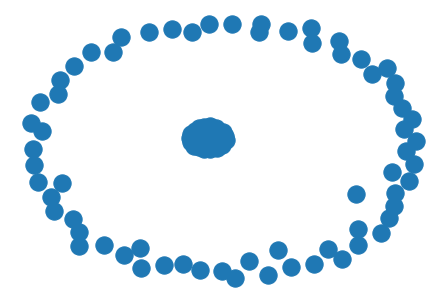

In [20]:
nx.draw(graph)

In [21]:
wikipedia.set_lang('fr')
page = wikipedia.page(list_articles[4].title)
print(page.content.split())

['Tarbut', ':', '(en', 'russe', ':', 'Тарбут)', '(en', 'hébreu', ':', 'תַרְבּוּת', '—', 'льтура)', 'était', 'une', 'organisation', 'culturelle', 'juive', 'sioniste', 'fondée', 'en', '1922,', 'à', 'Varsovie,', 'sous', "l'égide", 'de', 'laquelle,', 'durant', 'la', 'période', 'entre', 'les', 'deux', 'dernières', 'guerres', 'mondiales,', 'fut', 'créé', 'un', 'réseau', "d'enseignement", 'en', 'hébreu', 'en', 'Pologne,', 'en', 'Roumanie,', 'et', 'en', 'Lituanie.', 'Le', 'niveau', 'des', 'cours', 'couvrait', 'les', 'jardins', "d'enfants", "jusqu'aux", 'cours', 'pour', 'adultes.', 'Celle-ci', 'produisait', 'aussi', 'du', 'matériel', 'pédagogique', 'varié', 'pour', 'ses', 'élèves.', 'Les', 'écoles', 'Tarbuts', 'comptaient', '25', '829', 'étudiants', 'en', '1921', ';', '37', '000', 'en', '1934–1935', ';', 'et', '45', '000', 'dans', '270', 'établissements', 'en', '1939.', 'Ses', 'programmes', 'comprenaient', 'des', 'matières', 'telles', 'que', 'les', 'sciences,', 'les', 'sciences', 'humaines,', '